In [1]:
import glob
from bs4 import BeautifulSoup

# Define the classes of interest
classes = ['crude', 'interest', 'grain']

# Initialize an empty list for documents and labels
docs = []
labels = []

# Loop over the SGML files in the extracted folder
for file in glob.glob("reut2-*.sgm"):
  # Open and read the file
  with open(file, "r", encoding="latin-1") as f:
    # Parse the file using BeautifulSoup
    soup = BeautifulSoup(f.read(), "html.parser")
    # Loop over the articles in the file
    for article in soup.find_all("reuters"):
      # Get the text and the topics of the article
      text = article.find("text").get_text()
      topics = article.topics.find_all("d")
      # Check if the article has one topic and it is one of the classes of interest
      if len(topics) == 1 and topics[0].get_text() in classes:
        # Append the text and the topic to the lists
        docs.append(text)
        labels.append(topics[0].get_text())

# Print the number of documents and some examples
print(f'Number of documents: {len(docs)}')
print(f'Some examples: {docs[:10]}')


Number of documents: 744
Some examples: ['\x02\nU.S. GRAIN CARLOADINGS FALL IN WEEK\n    WASHINGTON, Feb 26 - U.S. grain carloadings totaled 26,108\ncars in the week ended February 21, down 2.2 pct from the\nprevious week but 22.8 pct above the corresponding week a year\nago, the Association of American Railroads reported.\n    Grain mill product loadings in the week totalled 11,382\ncars, down 1.8 pct from the previous week but 7.6 pct above the\nsame week a year earlier, the association said.\n Reuter\n\x03', '\x02\nDIAMOND SHAMROCK (DIA) CUTS CRUDE PRICES\n    NEW YORK, FEB 26 - Diamond Shamrock Corp said that\neffective today it had cut its contract prices for crude oil by\n1.50 dlrs a barrel.\n    The reduction brings its posted price for West Texas\nIntermediate to 16.00 dlrs a barrel, the copany said.\n    "The price reduction today was made in the light of falling\noil product prices and a weak crude oil market," a company\nspokeswoman said.\n    Diamond is the latest in a line

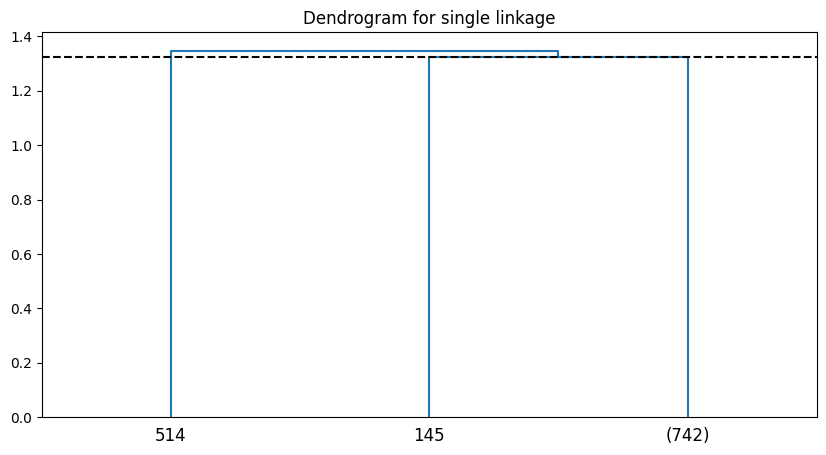

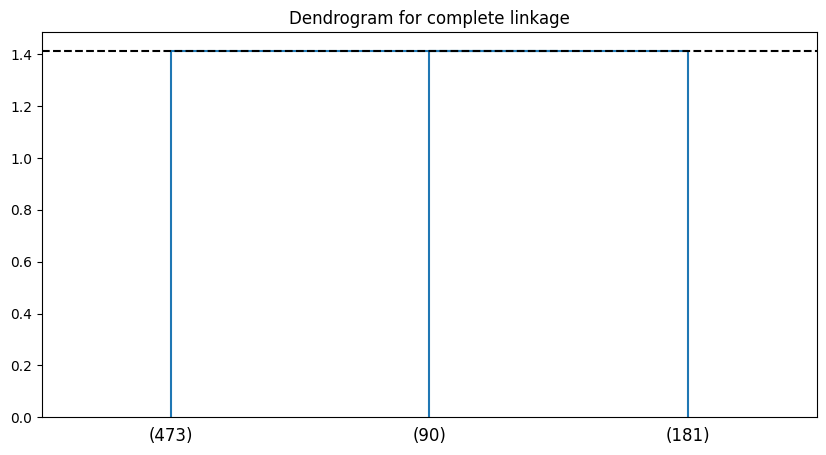

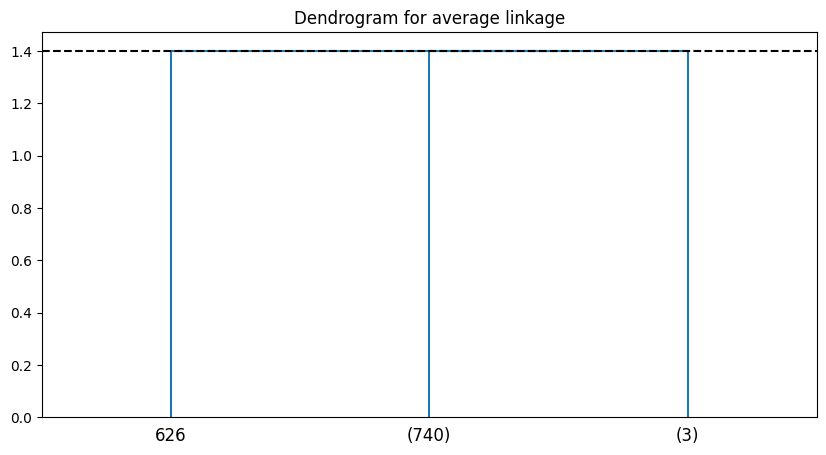

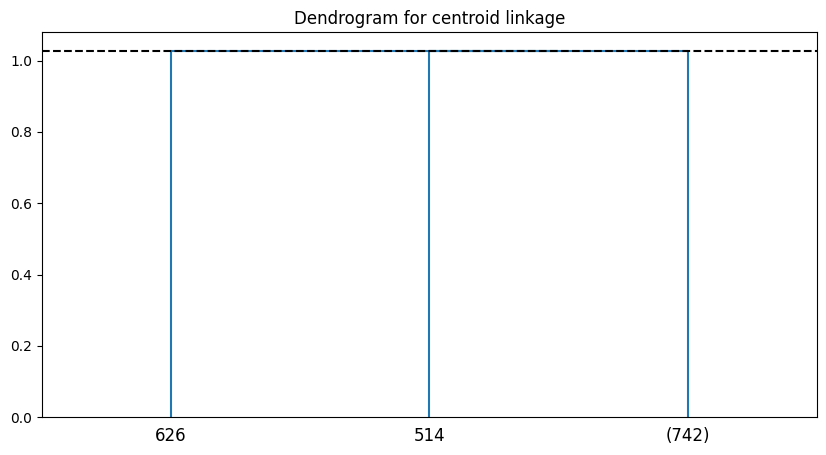

In [2]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define the linkage methods
methods = ['single', 'complete', 'average', 'centroid']

# Convert the documents into TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Loop over the methods and perform the clustering
for method in methods:
  # Compute the linkage matrix using euclidean distance
  Z = linkage(X.toarray(), method=method, metric='euclidean')
  
  # Cut the dendrogram at the second branch from the top
  K = 3
  clusters = fcluster(Z, K, criterion='maxclust')
  
  # Plot the dendrogram
  plt.figure(figsize=(10, 5))
  plt.title(f'Dendrogram for {method} linkage')
  dendrogram(Z, truncate_mode='lastp', p=K, leaf_font_size=12)
  plt.axhline(y=Z[-(K-1), 2], linestyle='--', color='black')
  plt.show()


In [3]:
from sklearn.metrics import rand_score

# Define the reference clustering
ref = clusters

# Loop over the methods and compute the Rand index
for method in methods:
  # Compute the linkage matrix
  Z = linkage(X.toarray(), method=method, metric='euclidean')
  
  # Cut the dendrogram at the second branch from the top
  K = 3
  clusters = fcluster(Z, K, criterion='maxclust')
  
  # Compute the Rand index
  ri = rand_score(ref, clusters)
  print(f'Rand index for {method} linkage: {ri:.3f}')


Rand index for single linkage: 0.995
Rand index for complete linkage: 0.538
Rand index for average linkage: 0.995
Rand index for centroid linkage: 1.000
